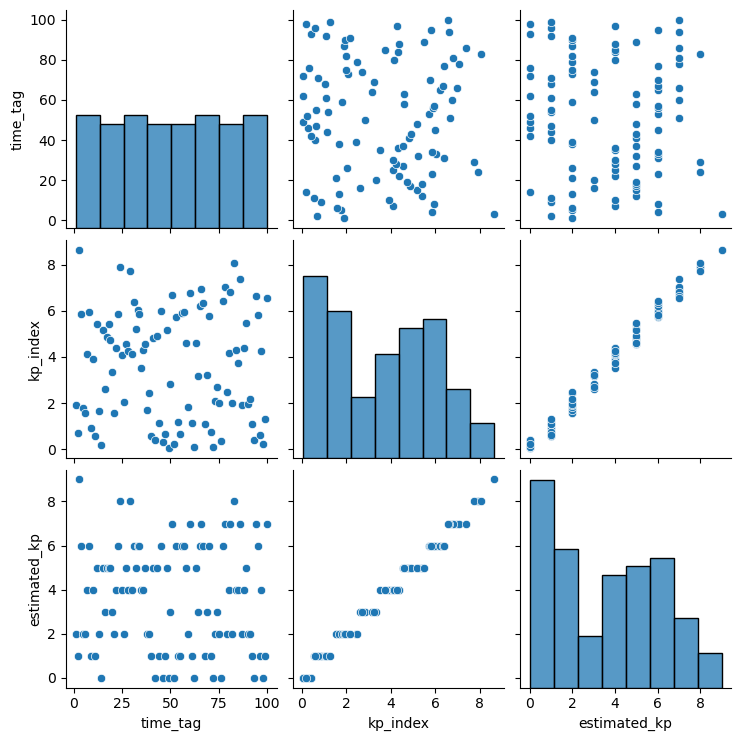

In [1]:
import seaborn as sns
import pandas as pd

data = pd.read_csv("kp_index.csv")
#data2 = pd.read_csv("dscovr_mag_1s.csv")


sns.pairplot(data)


In [2]:
data.head()

,time_tag,kp_index,estimated_kp
0,1,1.90,2
1,2,0.68,1
2,3,8.65,9
3,4,5.87,6
4,5,1.76,2


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

df = pd.read_csv('kp_index.csv')


df.fillna(df.mean(), inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
df['kp_index'] = scaler.fit_transform(df['kp_index'].values.reshape(-1,1))


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    agg = pd.concat(cols, axis=1)
    agg.columns = names

    if dropnan:
        agg.dropna(inplace=True)
    return agg

n_hours = 24
n_features = 1

reframed = series_to_supervised(df, n_hours, 1)

print(reframed.head())


    var1(t-24)  var2(t-24)  var3(t-24)  var1(t-23)  var2(t-23)  var3(t-23)  \
24         0.0    0.215116         2.0         0.0    0.073256         1.0   
25         0.0    0.073256         1.0         0.0    1.000000         9.0   
26         0.0    1.000000         9.0         0.0    0.676744         6.0   
27         0.0    0.676744         6.0         0.0    0.198837         2.0   
28         0.0    0.198837         2.0         0.0    0.177907         2.0   

    var1(t-22)  var2(t-22)  var3(t-22)  var1(t-21)  ...  var3(t-3)  var1(t-2)  \
24         0.0    1.000000         9.0         0.0  ...        4.0        0.0   
25         0.0    0.676744         6.0         0.0  ...        6.0        0.0   
26         0.0    0.198837         2.0         0.0  ...        8.0        0.0   
27         0.0    0.177907         2.0         0.0  ...        4.0        0.0   
28         0.0    0.470930         4.0         0.0  ...        2.0        0.0   

    var2(t-2)  var3(t-2)  var1(t-1)  var2(t-

In [4]:
from sklearn.model_selection import train_test_split

y = reframed['var1(t)']

X = reframed.drop('var1(t)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


Training set: (60, 74) (60,)
Test set: (16, 74) (16,)


    var1(t-24)  var2(t-24)  var3(t-24)  var1(t-23)  var2(t-23)  var3(t-23)  \
24         0.0    0.215116         2.0         0.0    0.073256         1.0   
25         0.0    0.073256         1.0         0.0    1.000000         9.0   
26         0.0    1.000000         9.0         0.0    0.676744         6.0   
27         0.0    0.676744         6.0         0.0    0.198837         2.0   
28         0.0    0.198837         2.0         0.0    0.177907         2.0   

    var1(t-22)  var2(t-22)  var3(t-22)  var1(t-21)  ...  var3(t-3)  var1(t-2)  \
24         0.0    1.000000         9.0         0.0  ...        4.0        0.0   
25         0.0    0.676744         6.0         0.0  ...        6.0        0.0   
26         0.0    0.198837         2.0         0.0  ...        8.0        0.0   
27         0.0    0.177907         2.0         0.0  ...        4.0        0.0   
28         0.0    0.470930         4.0         0.0  ...        2.0        0.0   

    var2(t-2)  var3(t-2)  var1(t-1)  var2(t-

Epoch 83/100
1/1 - 0s - loss: 0.0022 - val_loss: 0.0034 - 35ms/epoch - 35ms/step
Epoch 84/100
1/1 - 0s - loss: 0.0022 - val_loss: 0.0033 - 36ms/epoch - 36ms/step
Epoch 85/100
1/1 - 0s - loss: 0.0022 - val_loss: 0.0033 - 35ms/epoch - 35ms/step
Epoch 86/100
1/1 - 0s - loss: 0.0022 - val_loss: 0.0033 - 37ms/epoch - 37ms/step
Epoch 87/100
1/1 - 0s - loss: 0.0022 - val_loss: 0.0032 - 37ms/epoch - 37ms/step
Epoch 88/100
1/1 - 0s - loss: 0.0021 - val_loss: 0.0032 - 37ms/epoch - 37ms/step
Epoch 89/100
1/1 - 0s - loss: 0.0022 - val_loss: 0.0034 - 37ms/epoch - 37ms/step
Epoch 90/100
1/1 - 0s - loss: 0.0023 - val_loss: 0.0033 - 36ms/epoch - 36ms/step
Epoch 91/100
1/1 - 0s - loss: 0.0024 - val_loss: 0.0030 - 36ms/epoch - 36ms/step
Epoch 92/100
1/1 - 0s - loss: 0.0022 - val_loss: 0.0037 - 36ms/epoch - 36ms/step
Epoch 93/100
1/1 - 0s - loss: 0.0027 - val_loss: 0.0029 - 35ms/epoch - 35ms/step
Epoch 94/100
1/1 - 0s - loss: 0.0021 - val_loss: 0.0033 - 37ms/epoch - 37ms/step
Epoch 95/100
1/1 - 0s - loss

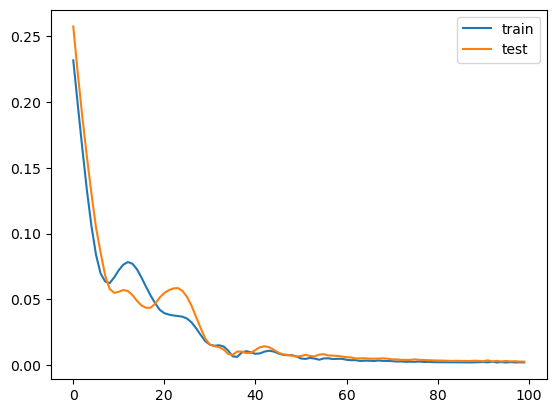

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt

df = pd.read_csv('kp_index.csv')


df.fillna(df.mean(), inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
df['kp_index'] = scaler.fit_transform(df['kp_index'].values.reshape(-1,1))
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

n_hours = 24
n_features = 1

reframed = series_to_supervised(df, n_hours, 1)

print(reframed.head())

y = reframed['var1(t)']

X = reframed.drop('var1(t)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)
print("\n")

X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
model.add(LSTM(24, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')

history = model.fit(X_train, y_train, epochs=100, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [6]:
import sklearn.metrics
from math import sqrt
#import numpy as np
from sklearn.metrics import mean_squared_error
from numpy import concatenate

yhat = model.predict(X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1)))

inv_yhat = concatenate((yhat, X_test.values[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

y_test = y_test.values.reshape((len(y_test), 1))
inv_y = concatenate((y_test, X_test.values[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)





1/1 [==============================] - 0s 330ms/step
Test RMSE: 0.041


4/4 [==============================] - 0s 2ms/step
[[0.01704857]
 [0.0325048 ]
 [0.02849265]
 [0.01994311]
 [0.02966943]
 [0.02078198]
 [0.01794596]
 [0.01724801]
 [0.02468938]
 [0.01714802]
 [0.02855514]
 [0.02128685]
 [0.03300308]
 [0.02565349]
 [0.01459233]
 [0.01817234]
 [0.01468427]
 [0.01748347]
 [0.01779061]
 [0.02476941]
 [0.03378605]
 [0.02452957]
 [0.02395399]
 [0.03216728]
 [0.01719793]
 [0.03773672]
 [0.03296197]
 [0.02083759]
 [0.02488967]
 [0.01668886]
 [0.02847186]
 [0.03656392]
 [0.03360875]
 [0.02100532]
 [0.02136234]
 [0.0180501 ]
 [0.01716465]
 [0.03737378]
 [0.03962936]
 [0.02415172]
 [0.0180501 ]
 [0.02385546]
 [0.02381611]
 [0.0323154 ]
 [0.03216728]
 [0.02797126]
 [0.01439508]
 [0.01779061]
 [0.04005004]
 [0.01701559]
 [0.02872159]
 [0.03324791]
 [0.04001256]
 [0.03242077]
 [0.01808495]
 [0.02521085]
 [0.03748431]
 [0.03398043]
 [0.02952652]
 [0.02108012]
 [0.03239973]
 [0.02078198]
 [0.03390301]
 [0.0256334 ]
 [0.02446973]
 [0.03750258]
 [0.01791131]
 [0.0205053

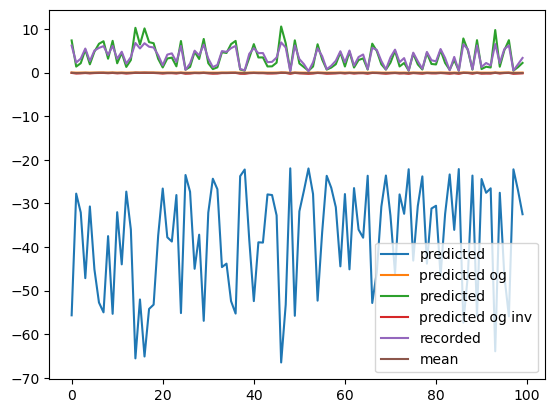

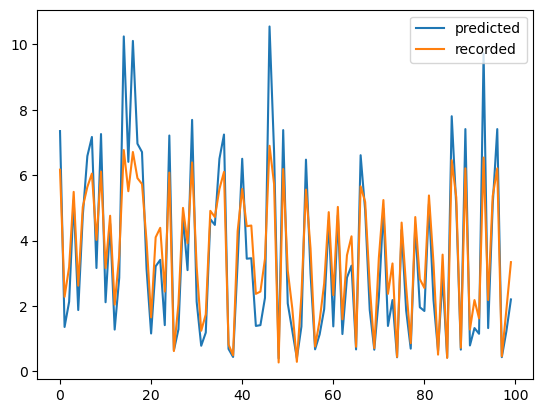

In [13]:
import numpy as np
import matplotlib.pyplot as plt

df_new=pd.read_csv("kp_index_prediction_test.csv")

df_new['time_tag'] = pd.to_datetime(df_new['time_tag'])

df_new['year'] = df_new['time_tag'].dt.year
df_new['month'] = df_new['time_tag'].dt.month
df_new['day'] = df_new['time_tag'].dt.day
df_new['hour'] = df_new['time_tag'].dt.hour
df_new['minute'] = df_new['time_tag'].dt.minute

df_new = df_new.drop('time_tag', axis=1)

new_data = df_new.values.astype('float32').reshape((df_new.shape[0], df_new.shape[1], 1))

new_yhat = model.predict(new_data)

inv_new_yhat = scaler.inverse_transform(new_yhat)
print(-new_yhat,inv_new_yhat)


plt.plot(1/new_yhat+3, label='predicted')
plt.plot(new_yhat, label='predicted og')
plt.plot(-1/inv_new_yhat-3, label='predicted')
plt.plot(inv_new_yhat, label='predicted og inv')
plt.plot(df_new['kp_index'], label='recorded')
plt.plot((inv_new_yhat+new_yhat)/2, label='mean')
plt.legend()
plt.show()

plt.plot(-1/inv_new_yhat-3, label='predicted')
plt.plot(df_new['kp_index'], label='recorded')
plt.legend()
plt.show()

